# Exercise 2: Regional Inequality (Resubmission)

### Julian Ornelas

In this exercise you will utliize various geoprocessing methods to derive new regional definitions. The regional definitions will then be used to examine spatial patterns of regional income inequality in the United States.

## Data Sets

The data files reside in ~/data/shared/usincome/`

- **counties.geojson** geometries for US counties
- **rs16my07** shapefile for US river system
- **CAINC1__ALL__AREAS_1969_21.csv** Income data for US Counties


**Due: 2024-02-29 11:59pm**


## Part 1 Regional Definitions

1. Extract the Mississippi River from the river dataset
2. Create a single polygon defined as the bounding rectangle for the county geometries
3. Create a new geoseries that adds two LineStrings to the Mississippi River from step 1. One runs from the northernmost point in the Mississippi north to the bounding rectangle for the county geometries. One that runs from the southernmost point in the Mississippi River south to the bounding rectangle of the county geodataframe from step 2.
4. Find the latitude of the  centroid for the Mississippi River. Create a Linestring that runs through this latitude and begins on the west of the county geodataframes bounding rectangle and runs to the east of the rectangle.
5. Based on the centroid of a county, use a spatial predicate to assign the county to one of the four regions that are defined by the faces that are generated by overlaying tthe linestring in step 4 and the Linestring in step 2.

## Part 2 Income Data

1. Create a pandas dataframe for the income data.
2. Subset the records for per capita income into a new dataframe.
3. Convert the per capita income data to an integer datatype. Drop any records with missing values.
4. Use an attribute join to combine the county income data with the geometries.



## Part 3 Regional Inequality

For the year 2021:

1. Calculate the mean and standard deviation of county per-capita incomes by the regions defined in Part 1
2. Using [pysal's Inequality package](https://inequality.readthedocs.io/en/latest/api.html) report the level of global inequality using  `Theil`.
3. Using `TheillDSim` test if the between region inequality is significantly different from what would be expected under a spatially random allocation of county incomes across the US.

## BEGIN WORK

## Part 1 Regional Definitions

1. Extract the Mississippi River from the river dataset


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

os.environ['PROJ_LIB'] = '/opt/tljh/user/share/proj'

In [2]:
river_gdf = gpd.read_file("rs16my07.shp")

In [3]:
river_gdf.head()

,RF1_150_ID,HUC,SEG,MILEPT,SEQNO,RFLAG,OWFLAG,TFLAG,SFLAG,TYPE,...,LOWV,WORKA,GAGECODE,STRAHLER,RR,DSRR,HUC2,HUC4,HUC6,geometry
0,1,1010001,1,0.0,2183,1,0,1,0,T,...,1.13,1,1,5,01010001001,1010001057,1,101,10100,"LINESTRING (-67.78957 47.05564, -67.79167 47.0..."
1,2,1010001,2,0.0,2181,1,0,0,0,R,...,1.13,0,1,5,01010001002,1010001001,1,101,10100,"LINESTRING (-67.92538 47.14244, -67.92738 47.1..."
2,3,1010001,3,0.0,2177,1,0,0,0,R,...,1.09,1,1,5,01010001003,1010001002,1,101,10100,"LINESTRING (-67.93918 47.15164, -67.94057 47.1..."
3,4,1010001,4,0.0,2098,1,0,0,0,R,...,0.96,1,1,4,01010001004,1010001003,1,101,10100,"LINESTRING (-68.61150 47.23894, -68.61420 47.2..."
4,7,1010001,19,0.0,2087,1,0,0,0,R,...,0.83,0,1,4,01010001019,1010001004,1,101,10100,"LINESTRING (-68.89530 47.17093, -68.89800 47.1..."


In [4]:
river_gdf.shape

(13685, 50)

In [5]:
river_gdf.columns

Index(['RF1_150_ID', 'HUC', 'SEG', 'MILEPT', 'SEQNO', 'RFLAG', 'OWFLAG',
       'TFLAG', 'SFLAG', 'TYPE', 'SEGL', 'LEV', 'J', 'K', 'PMILE', 'ARBSUM',
       'USDIR', 'TERMID', 'TRMBLV', 'PNAME', 'PNMCD', 'OWNAME', 'OWNMCD',
       'DSHUC', 'DSSEG', 'DSMLPT', 'EDITRF1_', 'DEMAND', 'FTIMPED', 'TFIMPED',
       'DIR', 'RESCODE', 'CENTER', 'ERF1__', 'RESERVOIR_', 'PNAME_RES',
       'PNMCD_RES', 'MEANQ', 'LOWQ', 'MEANV', 'LOWV', 'WORKA', 'GAGECODE',
       'STRAHLER', 'RR', 'DSRR', 'HUC2', 'HUC4', 'HUC6', 'geometry'],
      dtype='object')

In [6]:
river_gdf = river_gdf.dropna(subset=['PNAME'])

In [7]:
river_gdf.crs = 4326

<Axes: >

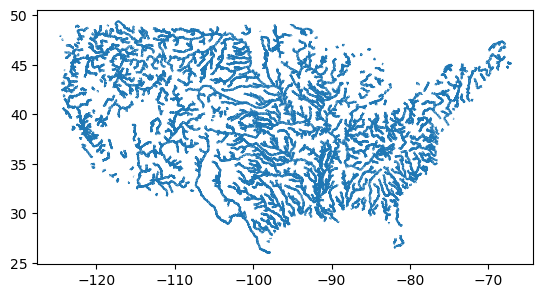

In [8]:
river_gdf.plot()

In [9]:
river_gdf.columns

Index(['RF1_150_ID', 'HUC', 'SEG', 'MILEPT', 'SEQNO', 'RFLAG', 'OWFLAG',
       'TFLAG', 'SFLAG', 'TYPE', 'SEGL', 'LEV', 'J', 'K', 'PMILE', 'ARBSUM',
       'USDIR', 'TERMID', 'TRMBLV', 'PNAME', 'PNMCD', 'OWNAME', 'OWNMCD',
       'DSHUC', 'DSSEG', 'DSMLPT', 'EDITRF1_', 'DEMAND', 'FTIMPED', 'TFIMPED',
       'DIR', 'RESCODE', 'CENTER', 'ERF1__', 'RESERVOIR_', 'PNAME_RES',
       'PNMCD_RES', 'MEANQ', 'LOWQ', 'MEANV', 'LOWV', 'WORKA', 'GAGECODE',
       'STRAHLER', 'RR', 'DSRR', 'HUC2', 'HUC4', 'HUC6', 'geometry'],
      dtype='object')

In [10]:
miss_river = river_gdf[river_gdf['PNAME'] == 'MISSISSIPPI R'] #can also use PNAME.str.lower() == 'mississippi r'
miss_river.head()

,RF1_150_ID,HUC,SEG,MILEPT,SEQNO,RFLAG,OWFLAG,TFLAG,SFLAG,TYPE,...,LOWV,WORKA,GAGECODE,STRAHLER,RR,DSRR,HUC2,HUC4,HUC6,geometry
3638,5542,7010101,4,0.0,13800,1,0,0,0,R,...,0.53,1,1,3,07010101004,7010101001,7,701,70101,"LINESTRING (-93.68713 47.24814, -93.68932 47.2..."
3639,5543,7010101,5,0.0,13798,1,0,0,0,R,...,0.52,0,1,3,07010101005,7010101004,7,701,70101,"LINESTRING (-93.79833 47.21764, -93.79833 47.2..."
3640,5545,7010101,8,0.0,13796,1,0,0,0,R,...,0.51,1,1,3,07010101008,7010101005,7,701,70101,"LINESTRING (-93.78933 47.28964, -93.79144 47.2..."
3641,5547,7010101,11,0.0,13794,1,0,0,0,R,...,0.50,1,1,3,07010101011,7010101008,7,701,70101,"LINESTRING (-93.88332 47.32054, -93.88554 47.3..."
3642,5552,7010101,36,0.0,13771,1,0,0,0,R,...,0.39,1,1,2,07010101036,7010101011,7,701,70101,"LINESTRING (-93.90572 47.29885, -93.90783 47.2..."


<Axes: >

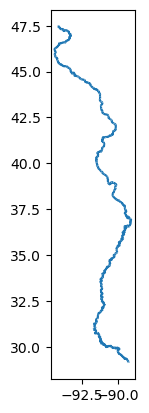

In [11]:
miss_river.plot()

In [12]:
miss_river.geometry

3638    LINESTRING (-93.68713 47.24814, -93.68932 47.2...
3639    LINESTRING (-93.79833 47.21764, -93.79833 47.2...
3640    LINESTRING (-93.78933 47.28964, -93.79144 47.2...
3641    LINESTRING (-93.88332 47.32054, -93.88554 47.3...
3642    LINESTRING (-93.90572 47.29885, -93.90783 47.2...
                              ...                        
4833    LINESTRING (-91.11803 32.67865, -91.11601 32.6...
4834    LINESTRING (-91.15552 32.63633, -91.15218 32.6...
4870    LINESTRING (-90.17800 35.08359, -90.17356 35.0...
8656    LINESTRING (-89.10278 36.97364, -89.10468 36.9...
8657    LINESTRING (-89.13439 36.98780, -89.13508 36.9...
Name: geometry, Length: 210, dtype: geometry

2. Create a single polygon defined as the bounding rectangle for the county geometries


In [13]:
counties_df = gpd.read_file("counties.geojson")
counties_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,075,00277302,0500000US06075,06075,San Francisco,06,121485107,479107241,"POLYGON ((-122.51198 37.77113, -122.46540 37.8..."
1,25,025,00606939,0500000US25025,25025,Suffolk,06,150855462,160479920,"POLYGON ((-71.19115 42.28306, -71.15689 42.330..."
2,31,007,00835826,0500000US31007,31007,Banner,06,1932676697,397069,"POLYGON ((-104.05283 41.69795, -103.37039 41.6..."
3,37,181,01008591,0500000US37181,37181,Vance,06,653705784,42187365,"POLYGON ((-78.49778 36.51448, -78.45728 36.541..."
4,48,421,01383996,0500000US48421,48421,Sherman,06,2390651189,428754,"POLYGON ((-102.16246 36.50033, -102.03234 36.5..."


In [14]:
counties_df.shape

(3220, 10)

In [15]:
counties_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

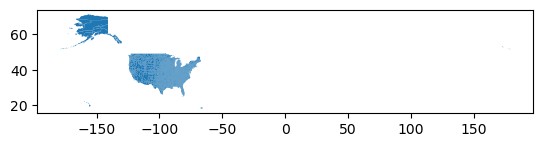

In [16]:
counties_df.plot()

In [17]:
# Want to filter out rows belonging to Alaska, Hawaii, and Puerto Rico
counties_df = counties_df.loc[~((counties_df['STATEFP'] == '02') | (counties_df['STATEFP'] == '15') | (counties_df['STATEFP'] == '72'))]

In [18]:
counties_df.shape

(3108, 10)

<Axes: >

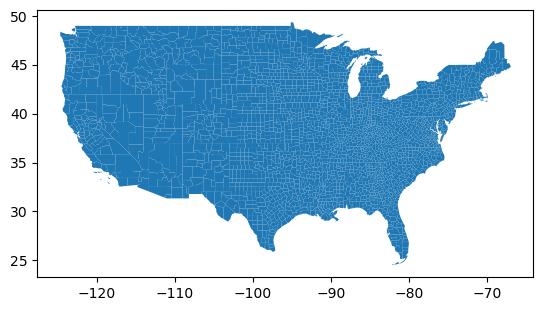

In [19]:
ax = counties_df.plot()
ax

In [20]:
counties_df.get_coordinates()

,x,y
0,-122.511983,37.771130
0,-122.465396,37.800879
0,-122.398139,37.805630
0,-122.385323,37.790724
0,-122.376462,37.738558
...,...,...
3219,-82.028238,33.544934
3219,-82.282830,33.362695
3219,-82.294179,33.354635
3219,-82.437081,33.550538


In [21]:
bound_pts = counties_df.total_bounds #SW to NE
bound_pts

array([-124.725839,   24.498131,  -66.949895,   49.384358])

In [22]:
from shapely import box

bound_box = box(bound_pts[0], bound_pts[1], bound_pts[2], bound_pts[3])

In [23]:
geo_box = gpd.GeoDataFrame({'geometry': bound_box}, index=[0], crs="EPSG:4326")

<Axes: >

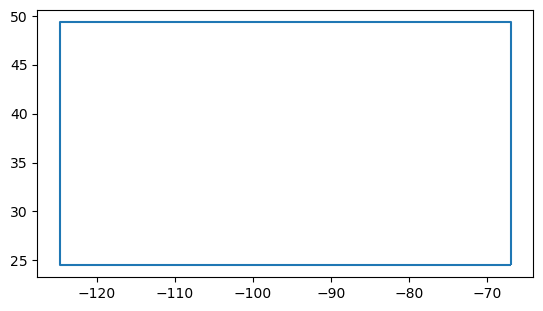

In [24]:
geo_box_boundary = geo_box.boundary
geo_box_boundary.plot()

3. Create a new geoseries that adds two LineStrings to the Mississippi River from step 1. One runs from the northernmost point in the Mississippi north to the bounding rectangle for the county geometries. One that runs from the southernmost point in the Mississippi River south to the bounding rectangle of the county geodataframe from step 2.


In [25]:
from shapely.geometry import Point, LineString

In [26]:
miss_coords = miss_river.get_coordinates()
miss_coords

,x,y
3638,-93.687126,47.248142
3638,-93.689323,47.246742
3638,-93.691536,47.245235
3638,-93.693733,47.243839
3638,-93.693825,47.242340
...,...,...
8657,-89.277878,37.091549
8657,-89.279678,37.091648
8657,-89.281586,37.091747
8657,-89.283386,37.091946


In [27]:
north_pt = miss_coords.loc[miss_coords.y == miss_coords.y.max()].iloc[0]
north_pt

x   -94.119232
y    47.456451
Name: 4456, dtype: float64

In [28]:
geo_box.get_coordinates()

,x,y
0,-66.949895,24.498131
0,-66.949895,49.384358
0,-124.725839,49.384358
0,-124.725839,24.498131
0,-66.949895,24.498131


In [29]:
geo_box_max_y = geo_box.get_coordinates().y.max()
geo_box_max_y

49.38435799906802

In [30]:
north_string = LineString([[north_pt.x, geo_box_max_y], [north_pt.x, north_pt.y]])

In [31]:
geo_box_min_y = geo_box.get_coordinates().y.min()
geo_box_min_y

24.498130999287387

In [32]:
south_pt = miss_coords.loc[miss_coords.y == miss_coords.y.min()].iloc[0]
south_pt

x   -89.247963
y    29.152422
Name: 4778, dtype: float64

In [33]:
south_string = LineString([[south_pt.x, south_pt.y], [south_pt.x, geo_box_min_y]])

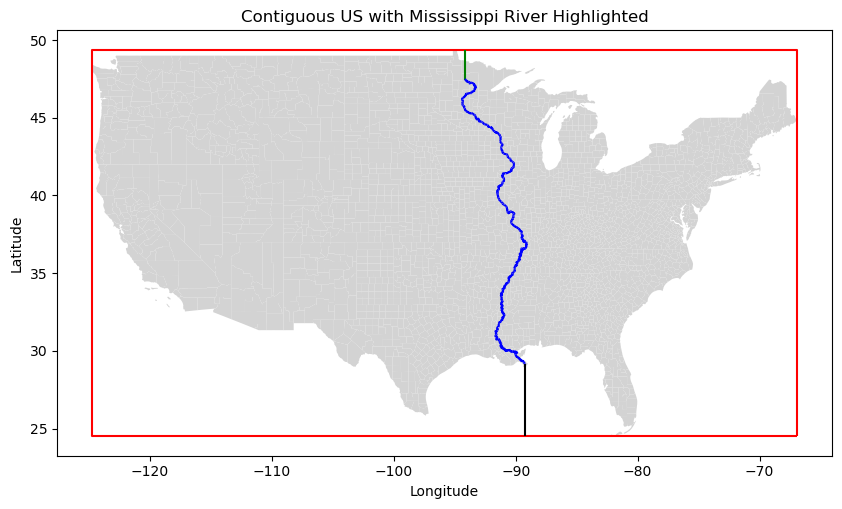

In [34]:
ax = counties_df.plot(color='lightgray', figsize=(10, 10))

gpd.GeoSeries(geo_box_boundary).plot(ax=ax, color='r')
gpd.GeoSeries(north_string).plot(ax=ax, color='g')
gpd.GeoSeries(south_string).plot(ax=ax, color='k')
miss_river.plot(ax=ax, color='b')

ax.set_title('Contiguous US with Mississippi River Highlighted')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
plt.show()

4. Find the latitude of the  centroid for the Mississippi River. Create a Linestring that runs through this latitude and begins on the west of the county geodataframes bounding rectangle and runs to the east of the rectangle.

In [35]:
north_pt.y

47.456451416015625

In [36]:
south_pt.y

29.152421951293945

In [37]:
from shapely import unary_union, centroid

north_to_south = unary_union([north_string, unary_union(miss_river.geometry), south_string])
centroid_pt = centroid(north_to_south)
centroid_lat = centroid_pt.y
centroid_lat

37.501029030327274

In [38]:
box_west = geo_box.get_coordinates().x.min()
box_west

-124.725839

In [39]:
box_east = geo_box.get_coordinates().x.max()
box_east

-66.949895

In [40]:
miss_centroid_string = LineString([[box_west, centroid_lat], [box_east, centroid_lat]])

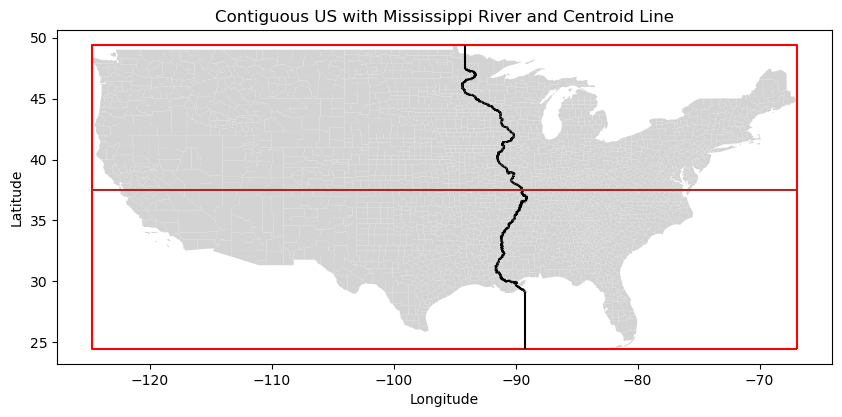

In [41]:
ax = counties_df.plot(color='lightgray', figsize=(10, 10))

gpd.GeoSeries(geo_box_boundary).plot(ax=ax, color='r')

gpd.GeoSeries(north_to_south).plot(ax=ax, color='k')
gpd.GeoSeries(miss_centroid_string).plot(ax=ax, color='brown')

ax.set_title('Contiguous US with Mississippi River and Centroid Line')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
plt.show()

5. Based on the centroid of a county, use a spatial predicate to assign the county to one of the four regions that are defined by the faces that are generated by overlaying the linestring in step 4 and the Linestring in step 2.

In [42]:
counties_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,075,00277302,0500000US06075,06075,San Francisco,06,121485107,479107241,"POLYGON ((-122.51198 37.77113, -122.46540 37.8..."
1,25,025,00606939,0500000US25025,25025,Suffolk,06,150855462,160479920,"POLYGON ((-71.19115 42.28306, -71.15689 42.330..."
2,31,007,00835826,0500000US31007,31007,Banner,06,1932676697,397069,"POLYGON ((-104.05283 41.69795, -103.37039 41.6..."
3,37,181,01008591,0500000US37181,37181,Vance,06,653705784,42187365,"POLYGON ((-78.49778 36.51448, -78.45728 36.541..."
4,48,421,01383996,0500000US48421,48421,Sherman,06,2390651189,428754,"POLYGON ((-102.16246 36.50033, -102.03234 36.5..."


First, get the centroid of each county.

In [43]:
counties_df['county_centroid'] = centroid(counties_df['geometry'])
counties_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,county_centroid
0,06,075,00277302,0500000US06075,06075,San Francisco,06,121485107,479107241,"POLYGON ((-122.51198 37.77113, -122.46540 37.8...",POINT (-122.43857 37.75215)
1,25,025,00606939,0500000US25025,25025,Suffolk,06,150855462,160479920,"POLYGON ((-71.19115 42.28306, -71.15689 42.330...",POINT (-71.07850 42.32795)
2,31,007,00835826,0500000US31007,31007,Banner,06,1932676697,397069,"POLYGON ((-104.05283 41.69795, -103.37039 41.6...",POINT (-103.71143 41.54634)
3,37,181,01008591,0500000US37181,37181,Vance,06,653705784,42187365,"POLYGON ((-78.49778 36.51448, -78.45728 36.541...",POINT (-78.40671 36.36881)
4,48,421,01383996,0500000US48421,48421,Sherman,06,2390651189,428754,"POLYGON ((-102.16246 36.50033, -102.03234 36.5...",POINT (-101.89332 36.27751)


In [44]:
len(counties_df.county_centroid)

3108

Second, looping over the county_centroid column, create a LineString connecting that point to the eastern edge of the bounding box, using the centroid's y-coordinate.  Create a new column called "county_to_east" to hold the LineStrings.

In [45]:
list_of_lines = []

for i in range(len(counties_df.county_centroid)):
    centroid_test_line = LineString(
                        [[counties_df.county_centroid.iloc[i].x, counties_df.county_centroid.iloc[i].y], 
                         [box_east, counties_df.county_centroid.iloc[i].y]]
                        )
    list_of_lines.append(gpd.GeoSeries(centroid_test_line)[0])

In [46]:
counties_df["county_to_east"] = list_of_lines
counties_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,county_centroid,county_to_east
0,06,075,00277302,0500000US06075,06075,San Francisco,06,121485107,479107241,"POLYGON ((-122.51198 37.77113, -122.46540 37.8...",POINT (-122.43857 37.75215),LINESTRING (-122.43856719607278 37.75215113583...
1,25,025,00606939,0500000US25025,25025,Suffolk,06,150855462,160479920,"POLYGON ((-71.19115 42.28306, -71.15689 42.330...",POINT (-71.07850 42.32795),LINESTRING (-71.07850441911708 42.327951400230...
2,31,007,00835826,0500000US31007,31007,Banner,06,1932676697,397069,"POLYGON ((-104.05283 41.69795, -103.37039 41.6...",POINT (-103.71143 41.54634),LINESTRING (-103.71143317849881 41.54634426457...
3,37,181,01008591,0500000US37181,37181,Vance,06,653705784,42187365,"POLYGON ((-78.49778 36.51448, -78.45728 36.541...",POINT (-78.40671 36.36881),LINESTRING (-78.40670845394374 36.368806733008...
4,48,421,01383996,0500000US48421,48421,Sherman,06,2390651189,428754,"POLYGON ((-102.16246 36.50033, -102.03234 36.5...",POINT (-101.89332 36.27751),LINESTRING (-101.89331558016262 36.27751472970...


Third, create a boolean column called "cross_miss_river" that tests whether each LineString crosses the north-to-south boundary created earlier, comprised of the Mississippi River and the two additional segments.  Use the spatial predicate "crosses".

In [47]:
list_of_booleans = []

for i in range(len(counties_df.county_to_east)):
    result = counties_df['county_to_east'].iloc[i].crosses(north_to_south)
    list_of_booleans.append(result)

counties_df['cross_miss_river'] = list_of_booleans
counties_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,county_centroid,county_to_east,cross_miss_river
0,06,075,00277302,0500000US06075,06075,San Francisco,06,121485107,479107241,"POLYGON ((-122.51198 37.77113, -122.46540 37.8...",POINT (-122.43857 37.75215),LINESTRING (-122.43856719607278 37.75215113583...,True
1,25,025,00606939,0500000US25025,25025,Suffolk,06,150855462,160479920,"POLYGON ((-71.19115 42.28306, -71.15689 42.330...",POINT (-71.07850 42.32795),LINESTRING (-71.07850441911708 42.327951400230...,False
2,31,007,00835826,0500000US31007,31007,Banner,06,1932676697,397069,"POLYGON ((-104.05283 41.69795, -103.37039 41.6...",POINT (-103.71143 41.54634),LINESTRING (-103.71143317849881 41.54634426457...,True
3,37,181,01008591,0500000US37181,37181,Vance,06,653705784,42187365,"POLYGON ((-78.49778 36.51448, -78.45728 36.541...",POINT (-78.40671 36.36881),LINESTRING (-78.40670845394374 36.368806733008...,False
4,48,421,01383996,0500000US48421,48421,Sherman,06,2390651189,428754,"POLYGON ((-102.16246 36.50033, -102.03234 36.5...",POINT (-101.89332 36.27751),LINESTRING (-101.89331558016262 36.27751472970...,True


Function for region classification.  If the county_centroid y-coordinate is greater than the MR centroid latitude, then it is North.  Else, it is South.  If cross_miss_river is True, then the county is west of the MR.  Else, it is east.

In [48]:
def classify_into_region(row):
    if (row['county_centroid'].y > centroid_lat):
        if (row['cross_miss_river']):
            region = 'NW'
        else:
            region = 'NE'

    elif (row['county_centroid'].y < centroid_lat): 
        if (row['cross_miss_river']): 
            region = 'SW'
        else:
            region = 'SE'

    return region

In [49]:
counties_df['region'] = counties_df.apply(classify_into_region, axis=1)
counties_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,county_centroid,county_to_east,cross_miss_river,region
0,06,075,00277302,0500000US06075,06075,San Francisco,06,121485107,479107241,"POLYGON ((-122.51198 37.77113, -122.46540 37.8...",POINT (-122.43857 37.75215),LINESTRING (-122.43856719607278 37.75215113583...,True,NW
1,25,025,00606939,0500000US25025,25025,Suffolk,06,150855462,160479920,"POLYGON ((-71.19115 42.28306, -71.15689 42.330...",POINT (-71.07850 42.32795),LINESTRING (-71.07850441911708 42.327951400230...,False,NE
2,31,007,00835826,0500000US31007,31007,Banner,06,1932676697,397069,"POLYGON ((-104.05283 41.69795, -103.37039 41.6...",POINT (-103.71143 41.54634),LINESTRING (-103.71143317849881 41.54634426457...,True,NW
3,37,181,01008591,0500000US37181,37181,Vance,06,653705784,42187365,"POLYGON ((-78.49778 36.51448, -78.45728 36.541...",POINT (-78.40671 36.36881),LINESTRING (-78.40670845394374 36.368806733008...,False,SE
4,48,421,01383996,0500000US48421,48421,Sherman,06,2390651189,428754,"POLYGON ((-102.16246 36.50033, -102.03234 36.5...",POINT (-101.89332 36.27751),LINESTRING (-101.89331558016262 36.27751472970...,True,SW


In [50]:
counties_df.shape

(3108, 14)

In [51]:
counties_df['region'].value_counts()

region
NW    887
NE    876
SE    761
SW    584
Name: count, dtype: int64

In [52]:
counties_df['region'].value_counts().sum()

3108

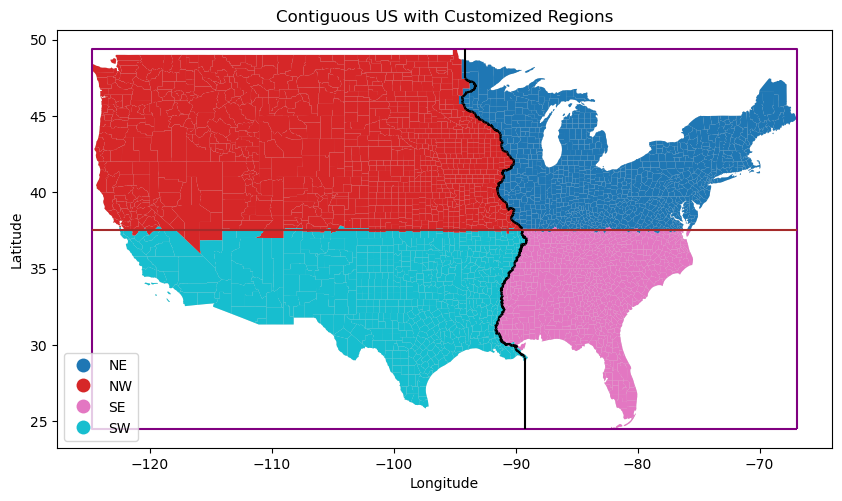

In [53]:
ax = counties_df.plot(color='lightgray', figsize=(10, 10))

gpd.GeoSeries(geo_box_boundary).plot(ax=ax, color='purple')
#gpd.GeoSeries(north_string).plot(ax=ax, color='k')
#gpd.GeoSeries(south_string).plot(ax=ax, color='g')
#miss_river.plot(ax=ax, color='b')

gpd.GeoSeries(north_to_south).plot(ax=ax, color='k')
gpd.GeoSeries(miss_centroid_string).plot(ax=ax, color='brown')

counties_df.plot(column='region', ax=ax, legend=True, legend_kwds={"loc": "lower left"})

ax.set_title('Contiguous US with Customized Regions')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
plt.show()

## Part 2 Income Data

1. Create a pandas dataframe for the income data.


In [54]:
income_df = pd.read_csv('CAINC1__ALL_AREAS_1969_2021.csv')
income_df.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,1970,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"""00000""",United States,,CAINC1,1.0,...,Personal income (thousands of dollars),Thousands of dollars,791229000,855525000,...,14003346000,14189228000,14969527000,15681233000,16092713000,16837337000,17671054000,18575467000,19812171000,21288709000
1,"""00000""",United States,,CAINC1,2.0,...,Population (persons) 1/,Number of persons,201298000,203798722,...,314344331,316735375,319270047,321829327,324367742,326623063,328542157,330233102,331501080,331893745
2,"""00000""",United States,,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,3931,4198,...,44548,44798,46887,48725,49613,51550,53786,56250,59765,64143
3,"""01000""",Alabama,5,CAINC1,1.0,...,Personal income (thousands of dollars),Thousands of dollars,9737715,10628318,...,173361655,175185262,181078773,189115437,192363456,199191774,206712014,216587513,232040332,250828813
4,"""01000""",Alabama,5,CAINC1,2.0,...,Population (persons) 1/,Number of persons,3440000,3449846,...,4839261,4864399,4886793,4908162,4930595,4952202,4976395,5003418,5024803,5039877


In [55]:
income_df['GeoFIPS'] = income_df['GeoFIPS'].str.replace('"', '')
income_df['GeoFIPS']

0                                                   00000
1                                                   00000
2                                                   00000
3                                                   01000
4                                                   01000
                              ...                        
9599                                                98000
9600                Note: See the included footnote file.
9601    CAINC1: County and MSA personal income summary...
9602    Last updated: November 16, 2022-- new statisti...
9603                     U.S. Bureau of Economic Analysis
Name: GeoFIPS, Length: 9604, dtype: object

In [56]:
income_df.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,1970,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,00000,United States,,CAINC1,1.0,...,Personal income (thousands of dollars),Thousands of dollars,791229000,855525000,...,14003346000,14189228000,14969527000,15681233000,16092713000,16837337000,17671054000,18575467000,19812171000,21288709000
1,00000,United States,,CAINC1,2.0,...,Population (persons) 1/,Number of persons,201298000,203798722,...,314344331,316735375,319270047,321829327,324367742,326623063,328542157,330233102,331501080,331893745
2,00000,United States,,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,3931,4198,...,44548,44798,46887,48725,49613,51550,53786,56250,59765,64143
3,01000,Alabama,5,CAINC1,1.0,...,Personal income (thousands of dollars),Thousands of dollars,9737715,10628318,...,173361655,175185262,181078773,189115437,192363456,199191774,206712014,216587513,232040332,250828813
4,01000,Alabama,5,CAINC1,2.0,...,Population (persons) 1/,Number of persons,3440000,3449846,...,4839261,4864399,4886793,4908162,4930595,4952202,4976395,5003418,5024803,5039877


In [57]:
income_df.columns

Index(['GeoFIPS', 'GeoName', 'Region', 'TableName', 'LineCode',
       'IndustryClassification', 'Description', 'Unit', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

2. Subset the records for per capita income into a new dataframe.


In [58]:
income_df.Description

0       Personal income (thousands of dollars) 
1                       Population (persons) 1/
2       Per capita personal income (dollars) 2/
3       Personal income (thousands of dollars) 
4                       Population (persons) 1/
                         ...                   
9599    Per capita personal income (dollars) 2/
9600                                        NaN
9601                                        NaN
9602                                        NaN
9603                                        NaN
Name: Description, Length: 9604, dtype: object

In [59]:
income_df = income_df.iloc[:-4]

In [60]:
per_capita_df = income_df[income_df['Description'].str.startswith("Per capita")]
per_capita_df.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,1970,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,00000,United States,,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,3931,4198,...,44548,44798,46887,48725,49613,51550,53786,56250,59765,64143
5,01000,Alabama,5,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,2831,3081,...,35824,36014,37055,38531,39014,40223,41539,43288,46179,49769
8,01001,"Autauga, AL",5,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,2780,3158,...,35433,35492,36487,38325,39221,40185,41243,42846,45248,48347
11,01003,"Baldwin, AL",5,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,2760,2905,...,38628,38828,40174,42137,43623,44870,46247,48380,51348,54659
14,01005,"Barbour, AL",5,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,2147,2545,...,27872,29719,29566,31277,31288,32167,33328,34870,37120,40428


In [61]:
per_capita_df.shape

(3200, 61)

3. Convert the per capita income data to an integer datatype. Drop any records with missing values.


In [62]:
for year in range(1969, 2022):
    per_capita_df[str(year)] = pd.to_numeric(per_capita_df[str(year)], errors='coerce')

/tmp/ipykernel_3356206/2975973043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  per_capita_df[str(year)] = pd.to_numeric(per_capita_df[str(year)], errors='coerce')


In [63]:
for year in range(1969, 2021+1):
    print(year, per_capita_df[str(year)].isna().sum())

1969 31
1970 31
1971 31
1972 31
1973 31
1974 31
1975 31
1976 31
1977 31
1978 31
1979 37
1980 37
1981 37
1982 36
1983 35
1984 35
1985 35
1986 35
1987 35
1988 34
1989 33
1990 33
1991 31
1992 31
1993 30
1994 30
1995 30
1996 30
1997 30
1998 30
1999 30
2000 30
2001 30
2002 29
2003 29
2004 29
2005 29
2006 29
2007 29
2008 28
2009 27
2010 27
2011 27
2012 27
2013 27
2014 27
2015 27
2016 27
2017 27
2018 27
2019 27
2020 26
2021 26


In [64]:
per_capita_df.dropna(inplace=True)

/tmp/ipykernel_3356206/2873310638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  per_capita_df.dropna(inplace=True)


In [65]:
for year in range(1969, 2021+1):
    print(year, per_capita_df[str(year)].isna().sum())

1969 0
1970 0
1971 0
1972 0
1973 0
1974 0
1975 0
1976 0
1977 0
1978 0
1979 0
1980 0
1981 0
1982 0
1983 0
1984 0
1985 0
1986 0
1987 0
1988 0
1989 0
1990 0
1991 0
1992 0
1993 0
1994 0
1995 0
1996 0
1997 0
1998 0
1999 0
2000 0
2001 0
2002 0
2003 0
2004 0
2005 0
2006 0
2007 0
2008 0
2009 0
2010 0
2011 0
2012 0
2013 0
2014 0
2015 0
2016 0
2017 0
2018 0
2019 0
2020 0
2021 0


In [66]:
per_capita_df.shape

(3149, 61)

4. Use an attribute join to combine the county income data with the geometries.

In [67]:
per_capita_df.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,1970,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,00000,United States,,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,3931.0,4198.0,...,44548.0,44798.0,46887.0,48725.0,49613.0,51550.0,53786.0,56250.0,59765.0,64143.0
5,01000,Alabama,5,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,2831.0,3081.0,...,35824.0,36014.0,37055.0,38531.0,39014.0,40223.0,41539.0,43288.0,46179.0,49769.0
8,01001,"Autauga, AL",5,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,2780.0,3158.0,...,35433.0,35492.0,36487.0,38325.0,39221.0,40185.0,41243.0,42846.0,45248.0,48347.0
11,01003,"Baldwin, AL",5,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,2760.0,2905.0,...,38628.0,38828.0,40174.0,42137.0,43623.0,44870.0,46247.0,48380.0,51348.0,54659.0
14,01005,"Barbour, AL",5,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,2147.0,2545.0,...,27872.0,29719.0,29566.0,31277.0,31288.0,32167.0,33328.0,34870.0,37120.0,40428.0


In [68]:
counties_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,county_centroid,county_to_east,cross_miss_river,region
0,06,075,00277302,0500000US06075,06075,San Francisco,06,121485107,479107241,"POLYGON ((-122.51198 37.77113, -122.46540 37.8...",POINT (-122.43857 37.75215),LINESTRING (-122.43856719607278 37.75215113583...,True,NW
1,25,025,00606939,0500000US25025,25025,Suffolk,06,150855462,160479920,"POLYGON ((-71.19115 42.28306, -71.15689 42.330...",POINT (-71.07850 42.32795),LINESTRING (-71.07850441911708 42.327951400230...,False,NE
2,31,007,00835826,0500000US31007,31007,Banner,06,1932676697,397069,"POLYGON ((-104.05283 41.69795, -103.37039 41.6...",POINT (-103.71143 41.54634),LINESTRING (-103.71143317849881 41.54634426457...,True,NW
3,37,181,01008591,0500000US37181,37181,Vance,06,653705784,42187365,"POLYGON ((-78.49778 36.51448, -78.45728 36.541...",POINT (-78.40671 36.36881),LINESTRING (-78.40670845394374 36.368806733008...,False,SE
4,48,421,01383996,0500000US48421,48421,Sherman,06,2390651189,428754,"POLYGON ((-102.16246 36.50033, -102.03234 36.5...",POINT (-101.89332 36.27751),LINESTRING (-101.89331558016262 36.27751472970...,True,SW


In [69]:
y = set(per_capita_df.GeoFIPS)

In [70]:
list(y)[:5]

[' 12001', ' 22029', ' 48457', ' 51942', ' 27107']

In [71]:
#Need to eliminate the whitespace in the GeoFIPS values in the per_capita_df

per_capita_df['GeoFIPS'] = per_capita_df['GeoFIPS'].str.strip()

/tmp/ipykernel_3356206/3633478712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  per_capita_df['GeoFIPS'] = per_capita_df['GeoFIPS'].str.strip()


In [72]:
per_capita_df['GeoFIPS'].tolist()[:5]

['00000', '01000', '01001', '01003', '01005']

In [73]:
joined_df = counties_df.merge(per_capita_df, left_on='GEOID', right_on='GeoFIPS')
joined_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,06,075,00277302,0500000US06075,06075,San Francisco,06,121485107,479107241,"POLYGON ((-122.51198 37.77113, -122.46540 37.8...",...,87665.0,88675.0,97887.0,105711.0,112804.0,119208.0,128812.0,130464.0,141134.0,160749.0
1,25,025,00606939,0500000US25025,25025,Suffolk,06,150855462,160479920,"POLYGON ((-71.19115 42.28306, -71.15689 42.330...",...,63394.0,62113.0,63235.0,67884.0,72720.0,77330.0,81593.0,83428.0,90941.0,98644.0
2,31,007,00835826,0500000US31007,31007,Banner,06,1932676697,397069,"POLYGON ((-104.05283 41.69795, -103.37039 41.6...",...,57369.0,81321.0,90728.0,90944.0,87793.0,56882.0,55285.0,58969.0,61329.0,68909.0
3,37,181,01008591,0500000US37181,37181,Vance,06,653705784,42187365,"POLYGON ((-78.49778 36.51448, -78.45728 36.541...",...,30492.0,30369.0,31649.0,32660.0,33360.0,34174.0,34929.0,36561.0,39845.0,44399.0
4,48,421,01383996,0500000US48421,48421,Sherman,06,2390651189,428754,"POLYGON ((-102.16246 36.50033, -102.03234 36.5...",...,64760.0,70183.0,81589.0,117666.0,79430.0,100215.0,84144.0,99946.0,95726.0,122945.0


In [74]:
joined_df.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'county_centroid', 'county_to_east',
       'cross_miss_river', 'region', 'GeoFIPS', 'GeoName', 'Region',
       'TableName', 'LineCode', 'IndustryClassification', 'Description',
       'Unit', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [75]:
joined_df.shape

(3052, 75)

## Part 3 Regional Inequality

For the year 2021:

1. Calculate the mean and standard deviation of county per-capita incomes by the regions defined in Part 1

In [76]:
df_2021 = joined_df[['region', '2021']]
df_2021.head()

,region,2021
0,NW,160749.0
1,NE,98644.0
2,NW,68909.0
3,SE,44399.0
4,SW,122945.0


In [77]:
df_2021[['region', '2021']].groupby(by='region').mean()

,2021
region,
NE,55036.026995
NW,57820.240406
SE,46468.390710
SW,51516.426117


In [78]:
df_2021[['region', '2021']].groupby(by='region').std()

,2021
region,
NE,13040.474087
NW,17075.404764
SE,9738.536245
SW,13669.972712


2. Using [pysal's Inequality package](https://inequality.readthedocs.io/en/latest/api.html) report the level of global inequality using  `Theil`.

In [79]:
import libpysal
import numpy as np
from inequality.theil import Theil

In [80]:
df_2021_inc = df_2021['2021']
df_2021_inc

0       160749.0
1        98644.0
2        68909.0
3        44399.0
4       122945.0
          ...   
3047     87214.0
3048     42546.0
3049     58126.0
3050     60290.0
3051     58242.0
Name: 2021, Length: 3052, dtype: float64

In [81]:
y = np.array(df_2021_inc.values).T
y

array([160749.,  98644.,  68909., ...,  58126.,  60290.,  58242.])

In [82]:
theil_y = Theil(y)

In [83]:
theil_y.T

0.030325956690934335

3. Using `TheillDSim` test if the between region inequality is significantly different from what would be expected under a spatially random allocation of county incomes across the US.

In [84]:
from inequality.theil import TheilDSim

In [85]:
df_2021[['region', '2021']]
df_2021

,region,2021
0,NW,160749.0
1,NE,98644.0
2,NW,68909.0
3,SE,44399.0
4,SW,122945.0
...,...,...
3047,NW,87214.0
3048,NW,42546.0
3049,NW,58126.0
3050,NW,60290.0


In [86]:
y = np.array(df_2021['2021']).T
y

array([160749.,  98644.,  68909., ...,  58126.,  60290.,  58242.])

In [87]:
regions = np.array(df_2021['region'])
regions

array(['NW', 'NE', 'NW', ..., 'NW', 'NW', 'SE'], dtype=object)

In [88]:
np.random.seed(10)

In [89]:
theil_ds = TheilDSim(y, regions, 999)

In [90]:
theil_ds.bg_pvalue

array([0.001])

The above p-value is less than 0.05, so it can be concluded that the between-region inequality is indeed significantly different that what would be expected if all the incomes were randomly permuted across all the contiguous US counties.